# RDKit Easy Tutorial

#### https://www.rdkit.org/  ---> **Open-Source Cheminformatics and Machine Learning**

# Reading and Writing Molecules

* SMILES = simplified molecular input line-entry system  is a specification in the form of a line notation

In [1]:
from rdkit import Chem

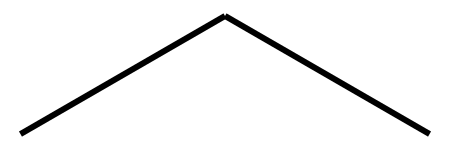

In [2]:
m = Chem.MolFromSmiles('CCC')
m   #Molecule From Smiles

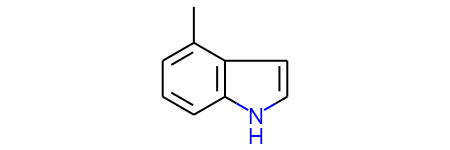

In [3]:
m = Chem.MolFromMolFile('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/Book/data/input.mol')
m #Mollecule From File

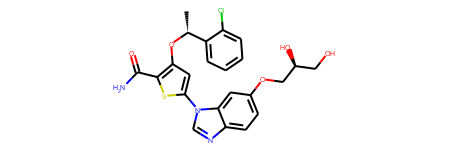

In [4]:
m = Chem.MolFromSmiles('C[C@@H](Oc1cc(sc1C(N)=O)-n1cnc2ccc(OC[C@@H](O)CO)cc12)c1ccccc1Cl') #"@@" indicates stereochemistry
m

# Reading sets of molecules

In [5]:
suppl = Chem.SDMolSupplier('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/Book/data/5ht3ligs.sdf')

In [6]:
for mol in suppl:
    print(mol.GetNumAtoms())

20
24
24
26


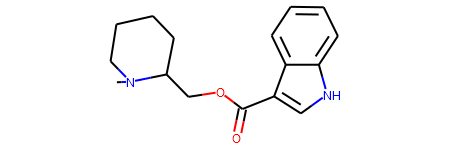

In [7]:
suppl[0]

In [8]:
mols = [x for x in suppl]
#lenght from supply
len(mols),mols[2]

(4, <rdkit.Chem.rdchem.Mol at 0x14c954741c0>)

In [9]:
import gzip  #unzip
inf = gzip.open('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/Book/data/actives_5ht3.sdf.gz')
gzsuppl = Chem.ForwardSDMolSupplier(inf)
ms = [x for x in gzsuppl if x is not None]
len(ms)

180

# Writing molecules

In [10]:
m = Chem.MolFromMolFile('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/Book/data/chiral.mol')
Chem.MolToSmiles(m) # Get Smiles From mol file

'C[C@H](O)c1ccccc1'


     RDKit          2D

  6  5  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4952    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
M  END



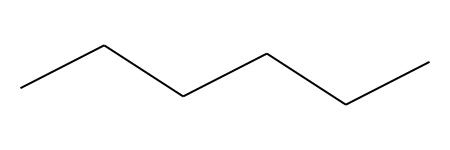

In [11]:
m2 = Chem.MolFromSmiles('CCCCCC')
print(Chem.MolToMolBlock(m2))    
# mol to block
m2

# Writing sets of molecules

In [12]:
w = Chem.SDWriter('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/Book/data/foo.sdf')
for m in mols: 
    w.write(m)


In [13]:
print(Chem.MolToMolBlock(m))

mol-732
     RDKit          3D

 26 29  0  0  0  0  0  0  0  0999 V2000
    3.2400    0.6400    0.0200 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0200    0.0800   -0.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1400   -0.3200    0.1600 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.1800    2.0400    0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2000   -1.2800   -0.2800 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7000    1.1800   -0.4200 S   0  0  0  0  0  0  0  0  0  0  0  0
    3.5200   -1.5200   -0.0400 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4600   -0.5200    0.4000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8600    2.4600   -0.1400 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3200    2.9200    0.3400 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2000   -2.1400   -0.5200 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600   -2.5200    0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.6600   -1.9000    0.3400 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0400   -1.88

# Working with 2D molecules: Generating Depictions

In [14]:
from rdkit.Chem import AllChem
from rdkit.Chem.AllChem import GenerateDepictionMatching2DStructure
from IPython.display import display, SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

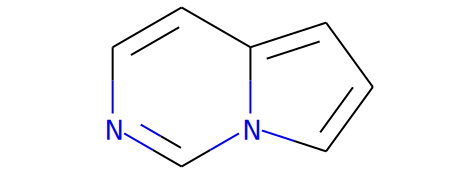

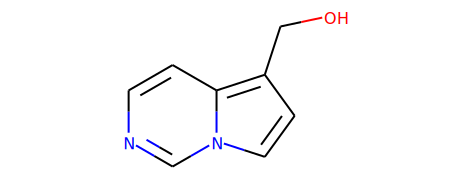

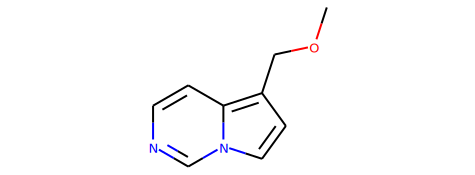

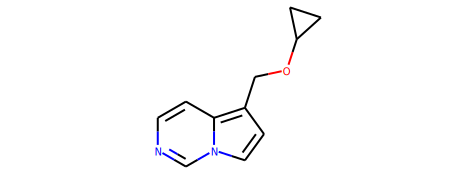

In [15]:
def show(mol,molSize=(475,175),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    assert mc.GetNumConformers() > 0
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    display(SVG(svg.replace('svg:','')))

template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)
show(template)
mol = Chem.MolFromSmiles('c1nccc2n1ccc2CO')
AllChem.GenerateDepictionMatching2DStructure(mol,template)
show(mol)
mol2 = Chem.MolFromSmiles('c1nccc2n1ccc2COC')
AllChem.GenerateDepictionMatching2DStructure(mol2,template)
show(mol2)
mol3 = Chem.MolFromSmiles('c1nccc2n1ccc2COC3CC3')
AllChem.GenerateDepictionMatching2DStructure(mol3,template)
show(mol3)

# Drawning at RDKit

In [16]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw

### Simple Drawn

In [17]:
mol = Chem.MolFromSmiles('CN(C)[C@H]3C[C@@H](C)O[C@@H](O[C@@H]2[C@@H](C)[C@H](O[C@H]1C[C@@](C)(OC)[C@@H](O)[C@H](C)O1)[C@@H](C)C(=O)O[C@H](CC)[C@@](C)(O)[C@H](O)[C@@H](C)N(C)C[C@H](C)C[C@@]2(C)O)[C@@H]3O')

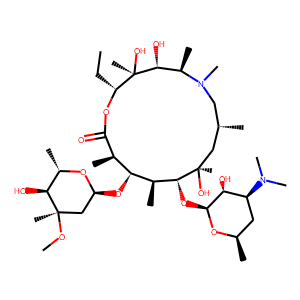

In [18]:
Draw.MolToImage(mol)

### Drawning Molts to Grid

In [19]:
suppl = Chem.SDMolSupplier('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/Book/data/5ht3ligs.sdf')
ms = [x for x in suppl if x is not None]
len(suppl)

4

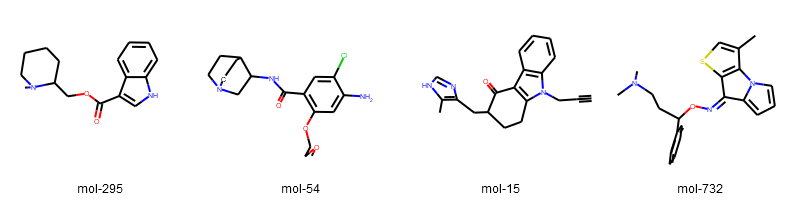

In [20]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in ms[:8]]) 
img

In [21]:
img.save('C:/Users/Marcel Milani/anaconda3/envs/my-rdkit-env/Library/share/RDKit/Docs/images/myexample.png')  #saving file

### Drawning Path of Molecule

In [22]:
from rdkit.Chem.Draw import rdMolDraw2D
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                    highlightBonds=hit_bonds)

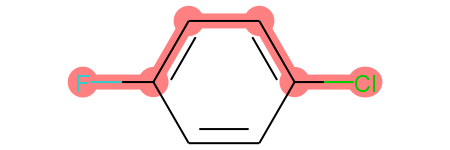

In [23]:
mol

# Substructure Searching

In [24]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')
m.HasSubstructMatch(patt)

True

In [25]:
m.GetSubstructMatch(patt)

(0, 5, 6)

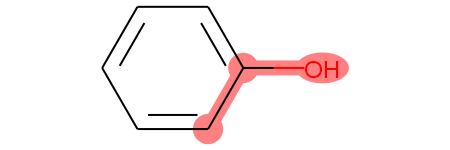

In [26]:
m

# Fingerprints

### Similarities

In [27]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.6

In [28]:
DataStructs.FingerprintSimilarity(fps[0],fps[2])

0.4

In [29]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.TanimotoSimilarity)
#Available similarity metrics include Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky

0.6

### Calculating Bits

In [30]:
#firt create array with 0´s
import numpy as np
from rdkit import DataStructs

def to_numpyarray_to_list(desc):
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(desc, arr)
    return arr.tolist()

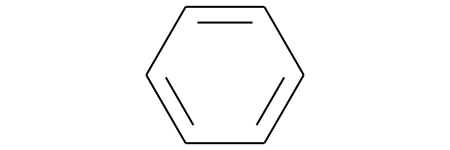

In [31]:
m = Chem.MolFromSmiles('c1ccccc1')
m

In [32]:
from rdkit.Chem import rdMolDescriptors
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)#m=mol, 2=radius of bits,1024 is the lenght of bits
fp                    

In [33]:
bits = to_numpyarray_to_list(fp)
bits

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

# Similarity maps

In [34]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

In [35]:
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

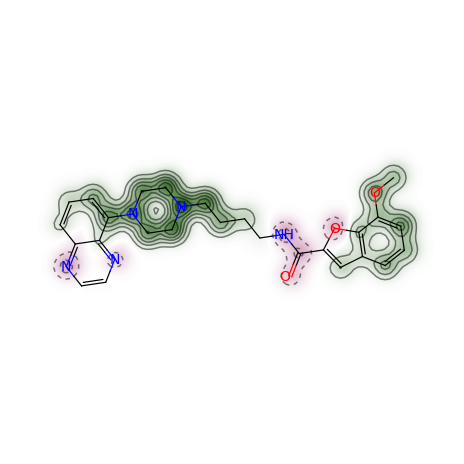

In [36]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
# green is more similar, pink is negative similarity

# Descriptors Section

In [37]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
arq = calc.GetDescriptorNames()

m = Chem.MolFromSmiles('c1ccccc1OC')
descriptor_calculator = calc.CalcDescriptors(m)

In [38]:
descriptor_calculator

(4.914166666666667,
 0.9097222222222224,
 4.914166666666667,
 0.9097222222222224,
 0.5316253154127668,
 108.13999999999999,
 100.07599999999998,
 108.057514876,
 42,
 0,
 0.11835771513702235,
 -0.4967685686134767,
 0.4967685686134767,
 0.11835771513702235,
 1.125,
 1.75,
 2.125,
 2.8320858350070903,
 145.73281445033504,
 5.819990956308912,
 4.794999636411992,
 4.794999636411992,
 3.931851652578137,
 2.5230560382187543,
 2.5230560382187543,
 1.5171766748170739,
 1.5171766748170739,
 0.9789074255654433,
 0.9789074255654433,
 0.5565779913075295,
 0.5565779913075295,
 -0.98,
 91.36757727918736,
 5.162450142450142,
 2.3586048594225155,
 0.9971092570832982,
 48.90989046340046,
 4.736862953800049,
 5.749511833283905,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.19910120538483,
 12.13273413692322,
 0.0,
 7.109797541277533,
 4.736862953800049,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.109797541277533,
 30.33183534230805,
 0.0,
 5.749511833283905,
 4.736862953800049,
 0.0,
 5.749511833283905,
 0.0

# Visualization of Descriptors

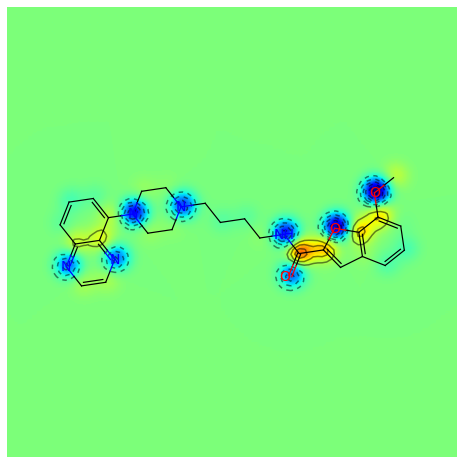

In [39]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

# Force Field

In [40]:
from rdkit import Chem
from rdkit.Chem import AllChem
mol = Chem.MolFromSmiles('CC')
m3 = Chem.AddHs(mol)
AllChem.EmbedMolecule(m3, AllChem.ETKDG()) #ETKDG OPTIMIZATION GEOMETRY
ff = AllChem.UFFGetMoleculeForceField(m3)
ff.Initialize()
ff.Minimize()
print(ff.CalcEnergy())

0.14127528400836697


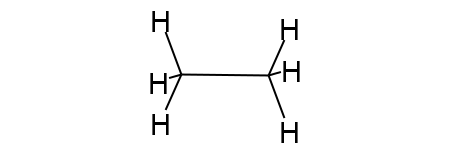

In [41]:
m3

## The End, Hope you Liked!